In [ ]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Loading the MNIST dataset

In [ ]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_test.shape[1]

28

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
y_train = utils.to_categorical(y_train,num_classes=10)
y_test = utils.to_categorical(y_test,num_classes=10)

print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
# normalising the test and train data images

x_train = x_train/255
x_test = x_test/255

## 2. Model-1: MLP with 2 hidden layers and softmax classifier

### 2.1 Using optimizer = Adam, activation-unit=ReLu

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

In [ ]:
input_dim = x_train.shape[1]
output_dim = 10
epochs = 15
batch_size = 128

In [ ]:
model = Sequential()
initializer = HeNormal()
model.add(Dense(512 , activation='relu' , kernel_initializer=initializer , input_dim=input_dim))     # hidden layer-1
model.add(Dense(128 , activation='relu' , kernel_initializer=initializer))
model.add(Dense(output_dim , activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

history = model.fit(x=x_train , y=y_train , batch_size=batch_size , epochs=epochs , verbose=1 , validation_data=(x_test,y_test))

Epoch 1/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2294 - accuracy: 0.9330 - val_loss: 0.1072 - val_accuracy: 0.9655
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0847 - accuracy: 0.9751 - val_loss: 0.0902 - val_accuracy: 0.9716
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0551 - accuracy: 0.9832 - val_loss: 0.0788 - val_accuracy: 0.9747
Epoch 4/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0745 - val_accuracy: 0.9788
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0743 - val_accuracy: 0.9785
Epoch 6/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0758 - val_accuracy: 0.9795
Epoch 7/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 0.0774 - val_accuracy: 0.9787

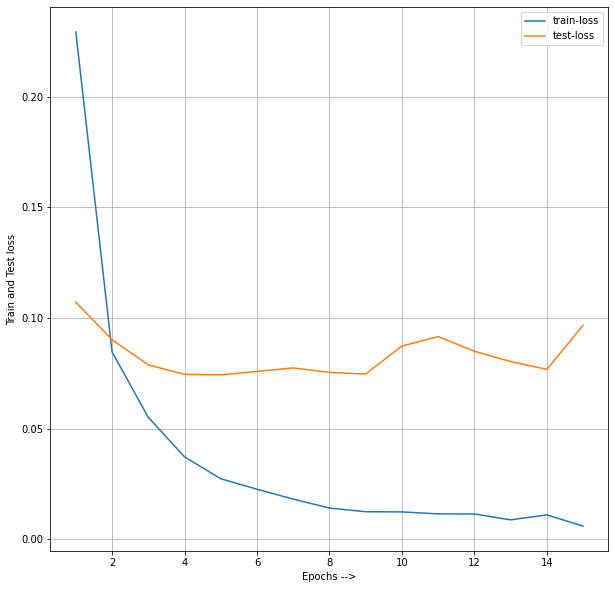

In [ ]:
# Plotting loss vs epochs

x = list([x for x in range(1,epochs+1)])
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
plt.plot(x,train_loss, label='train-loss')
plt.plot(x,test_loss,label='test-loss')
plt.xlabel('Epochs -->')
plt.ylabel('Train and Test loss')
plt.grid()
plt.legend()
plt.show()

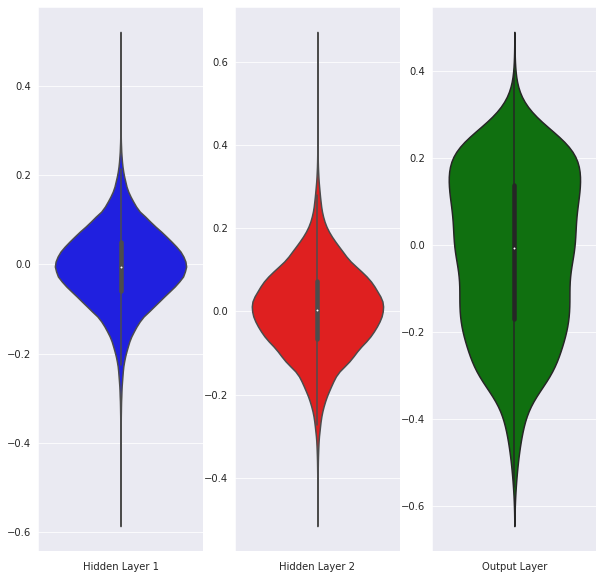

In [ ]:
weights = model.get_weights()

h1_w = weights[0].flatten().reshape(-1,1)
h2_w = weights[2].flatten().reshape(-1,1)
out_w = weights[4].flatten().reshape(-1,1)


sns.set_style('darkgrid')

fig = plt.figure(figsize=(10,10))
plt.title('Weight matrices after model trained')
plt.subplot(1,3,1)
sns.violinplot(y=h1_w , color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
sns.violinplot(y=h2_w , color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
sns.violinplot(y=out_w , color='g')
plt.xlabel('Output Layer')

plt.show()

### 2.2 Using Optimizer=adam , Activation-Unit=relu , Batch-Normalization 

In [ ]:
model = Sequential()
initializer = HeNormal()
model.add(Dense(512 , activation='relu' , kernel_initializer=initializer , input_dim=input_dim))     # hidden layer-1
model.add(BatchNormalization())
model.add(Dense(128 , activation='relu' , kernel_initializer=initializer))            # hidden layer-2
model.add(BatchNormalization())
model.add(Dense(output_dim , activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

history = model.fit(x=x_train , y=y_train , batch_size=batch_size , epochs=epochs , verbose=1 , validation_data=(x_test,y_test))

Epoch 1/15
469/469 [==============================] - 6s 11ms/step - loss: 0.1865 - accuracy: 0.9443 - val_loss: 0.1118 - val_accuracy: 0.9647
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0704 - accuracy: 0.9785 - val_loss: 0.0936 - val_accuracy: 0.9701
Epoch 3/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0833 - val_accuracy: 0.9737
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0901 - val_accuracy: 0.9724
Epoch 5/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0272 - accuracy: 0.9911 - val_loss: 0.0858 - val_accuracy: 0.9747
Epoch 6/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0222 - accuracy: 0.9925 - val_loss: 0.0754 - val_accuracy: 0.9784
Epoch 7/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0845 - val_accuracy: 0.9766

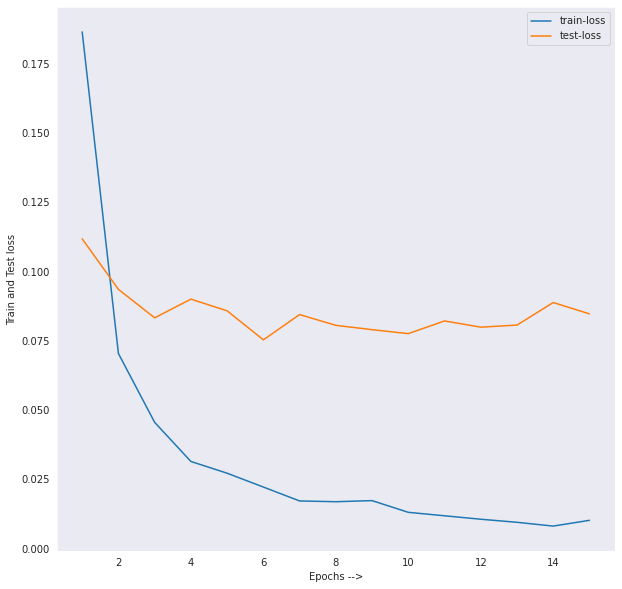

In [ ]:
# Plotting loss vs epochs

x = list([x for x in range(1,epochs+1)])
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
plt.plot(x,train_loss, label='train-loss')
plt.plot(x,test_loss,label='test-loss')
plt.xlabel('Epochs -->')
plt.ylabel('Train and Test loss')
plt.grid()
plt.legend()
plt.show()

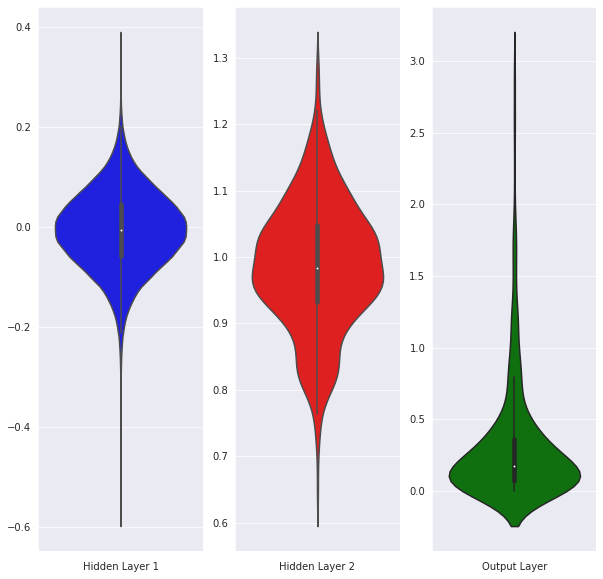

In [ ]:
weights = model.get_weights()

h1_w = weights[0].flatten().reshape(-1,1)
h2_w = weights[2].flatten().reshape(-1,1)
out_w = weights[4].flatten().reshape(-1,1)


sns.set_style('darkgrid')

fig = plt.figure(figsize=(10,10))
plt.title('Weight matrices after model trained')
plt.subplot(1,3,1)
sns.violinplot(y=h1_w , color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
sns.violinplot(y=h2_w , color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
sns.violinplot(y=out_w , color='g')
plt.xlabel('Output Layer')

plt.show()

### 2.3 Optimizer=adam , Activation-Unit=relu , Batch-Normalization , DropOut

In [ ]:
model = Sequential()
initializer = HeNormal()
model.add(Dense(512 , activation='relu' , kernel_initializer=initializer , input_dim=input_dim))     # hidden layer-1
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128 , activation='relu' , kernel_initializer=initializer))            # hidden layer-2
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim , activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

history = model.fit(x=x_train , y=y_train , batch_size=batch_size , epochs=epochs , verbose=1 , validation_data=(x_test,y_test))

Epoch 1/15
469/469 [==============================] - 6s 12ms/step - loss: 0.4269 - accuracy: 0.8703 - val_loss: 0.1435 - val_accuracy: 0.9545
Epoch 2/15
469/469 [==============================] - 5s 12ms/step - loss: 0.2039 - accuracy: 0.9380 - val_loss: 0.1014 - val_accuracy: 0.9687
Epoch 3/15
469/469 [==============================] - 5s 12ms/step - loss: 0.1598 - accuracy: 0.9519 - val_loss: 0.0865 - val_accuracy: 0.9728
Epoch 4/15
469/469 [==============================] - 5s 12ms/step - loss: 0.1338 - accuracy: 0.9597 - val_loss: 0.0807 - val_accuracy: 0.9754
Epoch 5/15
469/469 [==============================] - 5s 12ms/step - loss: 0.1160 - accuracy: 0.9643 - val_loss: 0.0721 - val_accuracy: 0.9778
Epoch 6/15
469/469 [==============================] - 5s 12ms/step - loss: 0.1076 - accuracy: 0.9663 - val_loss: 0.0708 - val_accuracy: 0.9777
Epoch 7/15
469/469 [==============================] - 5s 12ms/step - loss: 0.1013 - accuracy: 0.9684 - val_loss: 0.0729 - val_accuracy: 0.9769

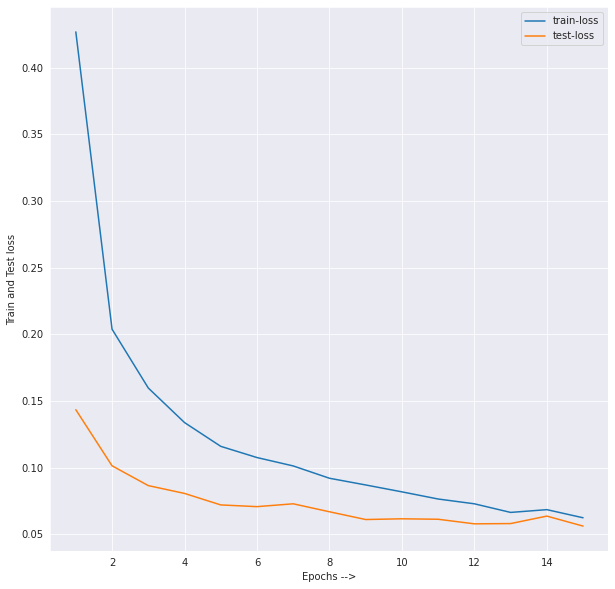

In [ ]:
# Plotting loss vs epochs

x = list([x for x in range(1,epochs+1)])
train_loss = history.history['loss']
test_loss = history.history['val_loss']

sns.set_style(style='darkgrid')

plt.figure(figsize=(10,10))
plt.plot(x,train_loss, label='train-loss')
plt.plot(x,test_loss,label='test-loss')
plt.xlabel('Epochs -->')
plt.ylabel('Train and Test loss')
#plt.grid()
plt.legend()
plt.show()

**Obsevation**
- Adding drop-out layer before every hidden layer has prevented overfitting of our model

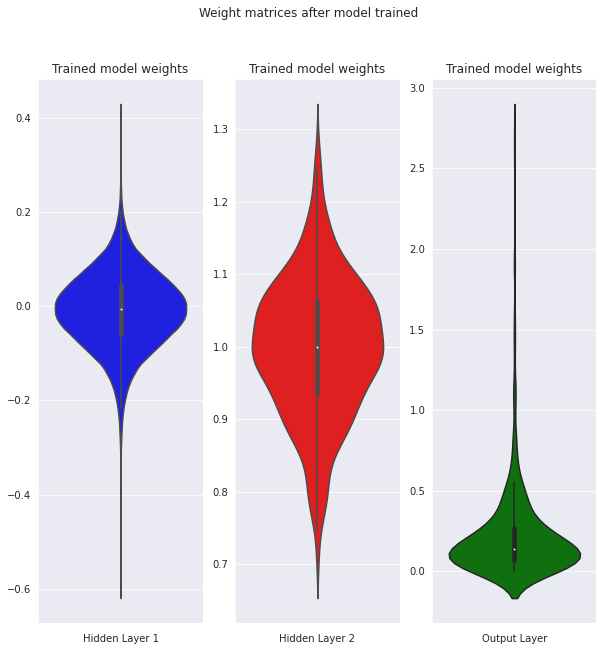

In [ ]:
weights = model.get_weights()

h1_w = weights[0].flatten().reshape(-1,1)
h2_w = weights[2].flatten().reshape(-1,1)
out_w = weights[4].flatten().reshape(-1,1)


sns.set_style('darkgrid')

fig = plt.figure(figsize=(10,10))
plt.suptitle('Weight matrices after model trained')
plt.subplot(1,3,1)
plt.title('Trained model weights')
sns.violinplot(y=h1_w , color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,3,2)
plt.title('Trained model weights')
sns.violinplot(y=h2_w , color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,3,3)
plt.title('Trained model weights')
sns.violinplot(y=out_w , color='g')
plt.xlabel('Output Layer')

plt.show()

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print(f"test-loss: {score[0]}")
print(f"test-accuracy: {score[1]}")

test-loss: 0.056180913001298904
test-accuracy: 0.9824000000953674


## 2. Model with 4-layers and softmax

In [ ]:
model = Sequential()
model.add(Dense(512 , activation='relu' , kernel_initializer=initializer , input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256 , activation='relu' , kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256 , activation='relu' , kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128 , activation='relu' , kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim , activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

In [ ]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

history = model.fit(x=x_train,y=y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/15
469/469 [==============================] - 10s 20ms/step - loss: 0.7853 - accuracy: 0.7610 - val_loss: 0.1974 - val_accuracy: 0.9398
Epoch 2/15
469/469 [==============================] - 9s 19ms/step - loss: 0.3004 - accuracy: 0.9121 - val_loss: 0.1371 - val_accuracy: 0.9600
Epoch 3/15
469/469 [==============================] - 9s 19ms/step - loss: 0.2304 - accuracy: 0.9339 - val_loss: 0.1137 - val_accuracy: 0.9657
Epoch 4/15
469/469 [==============================] - 9s 18ms/step - loss: 0.1897 - accuracy: 0.9455 - val_loss: 0.1011 - val_accuracy: 0.9692
Epoch 5/15
469/469 [==============================] - 9s 19ms/step - loss: 0.1639 - accuracy: 0.9525 - val_loss: 0.0945 - val_accuracy: 0.9731
Epoch 6/15
469/469 [==============================] - 9s 19ms/step - loss: 0.1496 - accuracy: 0.9568 - val_loss: 0.0891 - val_accuracy: 0.9741
Epoch 7/15
469/469 [==============================] - 9s 19ms/step - loss: 0.1380 - accuracy: 0.9600 - val_loss: 0.0817 - val_accuracy: 0.977

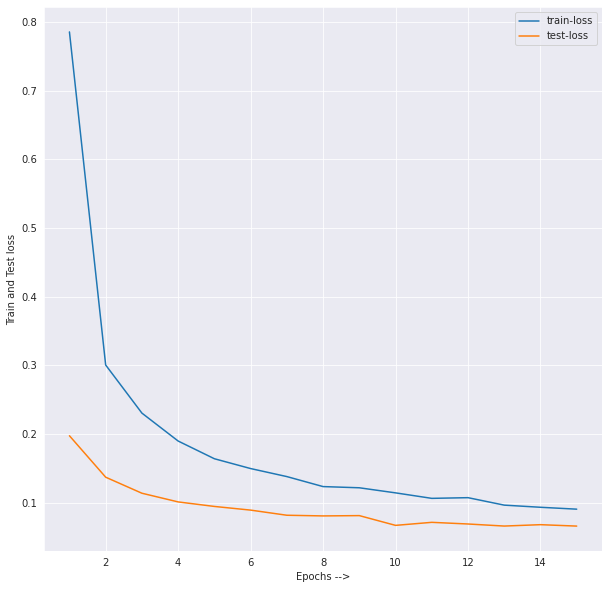

In [ ]:
# Plotting loss vs epochs

x = list([x for x in range(1,epochs+1)])
train_loss = history.history['loss']
test_loss = history.history['val_loss']

sns.set_style(style='darkgrid')

plt.figure(figsize=(10,10))
plt.plot(x,train_loss, label='train-loss')
plt.plot(x,test_loss,label='test-loss')
plt.xlabel('Epochs -->')
plt.ylabel('Train and Test loss')
#plt.grid()
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
print(f"test-loss: {score[0]}")
print(f"test-accuracy: {score[1]}")

test-loss: 0.06588227301836014
test-accuracy: 0.9825000166893005


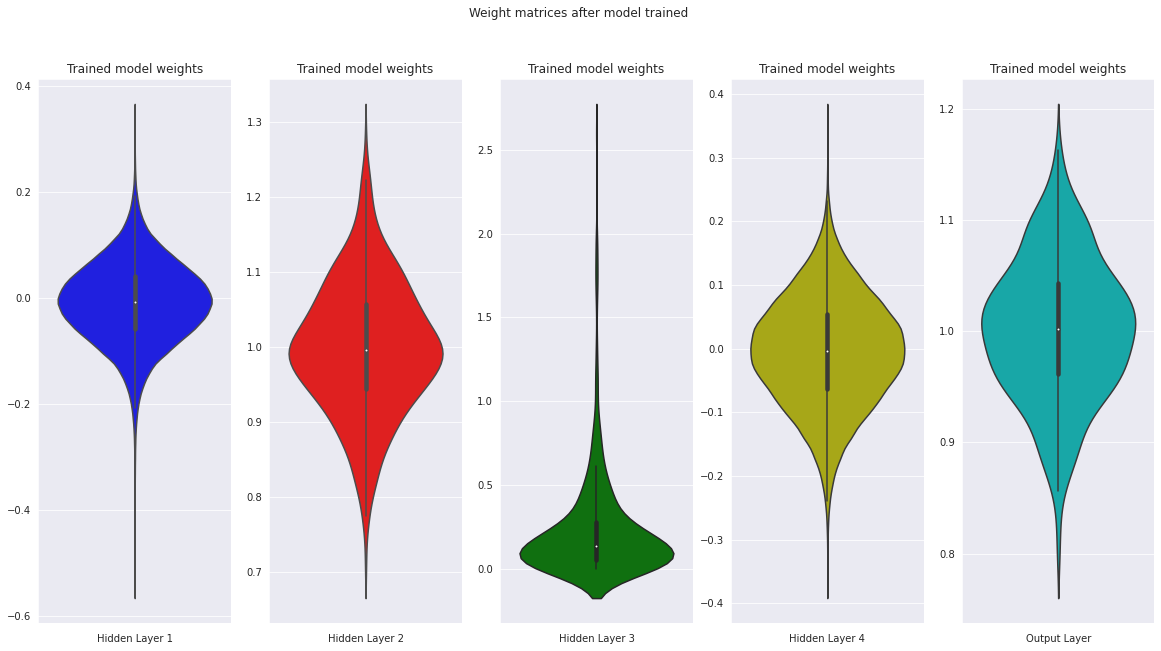

In [ ]:
weights = model.get_weights()

h1_w = weights[0].flatten().reshape(-1,1)
h2_w = weights[2].flatten().reshape(-1,1)
h3_w = weights[4].flatten().reshape(-1,1)
h4_w = weights[6].flatten().reshape(-1,1)
out_w = weights[8].flatten().reshape(-1,1)

sns.set_style('darkgrid')

fig = plt.figure(figsize=(20,10))
plt.suptitle('Weight matrices after model trained')
plt.subplot(1,5,1)
plt.title('Trained model weights')
sns.violinplot(y=h1_w , color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1,5,2)
plt.title('Trained model weights')
sns.violinplot(y=h2_w , color='r')
plt.xlabel('Hidden Layer 2')

plt.subplot(1,5,3)
plt.title('Trained model weights')
sns.violinplot(y=h3_w , color='g')
plt.xlabel('Hidden Layer 3')

plt.subplot(1,5,4)
plt.title('Trained model weights')
sns.violinplot(y=h4_w , color='y')
plt.xlabel('Hidden Layer 4')

plt.subplot(1,5,5)
plt.title('Trained model weights')
sns.violinplot(y=out_w , color='c')
plt.xlabel('Output Layer')


plt.show()